# TRAINING

In [1]:
import distilbert_train_modules as dbtm 
import distilbert as db

/home/ubuntu/project/venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Import configuration
config = dbtm.CONFIG
model, training_args, training_tokenizer, data_collator = dbtm.build_config(config=config)


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias', 'pre_classifier

In [4]:
# Pre-Process data
filename = 'reviews.csv'
preprocessed_data = dbtm.preprocess_data_for_train(filename=filename)
tokenized_dataset, full_dataset, train_dataset, val_dataset, test_dataset = dbtm.prepare_training_data(preprocessed_data, config=config, training_tokenizer=training_tokenizer)


In [5]:
import torch
torch.cuda.is_available()

True

In [6]:

# Train -> prepare to wait if not having GPU
import time

start_time = time.time()
dbtm.train(model=model, training_args=training_args, tokenized_dataset=tokenized_dataset, tokenizer=training_tokenizer,\
           data_collator=data_collator, compute_metrics=dbtm.compute_metrics)
## This run will save different model checkpoints (folders) into the specified directory in config
## The model behind scoring API is the last checkpoint, which has highest validation accuracy
end_time = time.time()
print(f'Training time: {end_time - start_time}')

/home/ubuntu/project/venv/lib/python3.8/site-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Training time: 609.7435579299927


# EVALUATION

## Current Model in Hugging Face

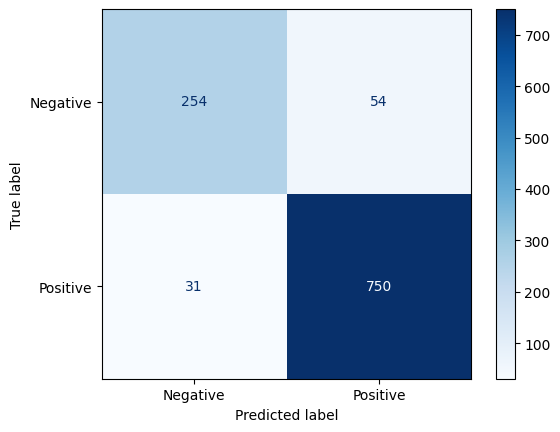

In [8]:
model_hf, tokenizer_hf = db.load_distilbert_model()
predictions = db.predict(test_dataset['text'], model=model_hf, tokenizer=tokenizer_hf)
db.visualize_confusion_matrix(predicted_labels=predictions['preds'],\
                              real_labels=test_dataset['label'])

In [9]:

report = db.confusion_matrix(predicted_labels=predictions['preds'],\
                              real_labels=test_dataset['label'])
print('accuracy: ', report['accuracy'])

accuracy:  0.9219467401285583


## Model from checkpoint 10

In [7]:
def load_model_dynamic(model_link):
    try:
        from transformers import AutoTokenizer, AutoModelForSequenceClassification
        import torch

        model = AutoModelForSequenceClassification.from_pretrained(model_link)
        tokenizer = AutoTokenizer.from_pretrained(model_link)

        return model, tokenizer
    except Exception as e:
        import traceback
        exc = traceback.format_exc()
        error_message = str(exc.replace("\n", ""))
        return error_message

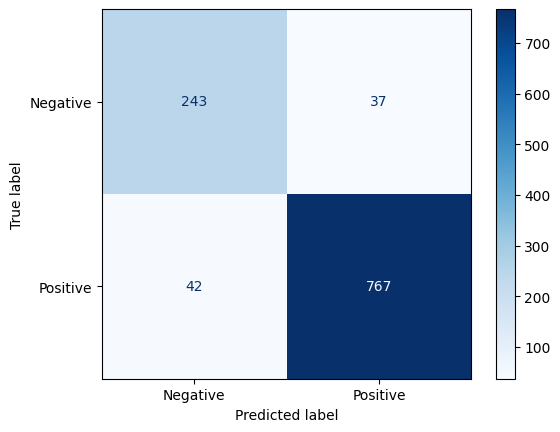

In [10]:
model10, tokenizer10 = load_model_dynamic("./DistilBERT1/checkpoint-2050/")
predictions = db.predict(test_dataset['text'], model=model10, tokenizer=tokenizer10)
db.visualize_confusion_matrix(predicted_labels=predictions['preds'],\
                              real_labels=test_dataset['label'])

In [11]:
report = db.confusion_matrix(predicted_labels=predictions['preds'],\
                              real_labels=test_dataset['label'])
print('accuracy: ', report['accuracy'])

accuracy:  0.9274563820018366


In [14]:
full_df = dbtm.preprocess_data_for_train('reviews.csv')
full_dataset_forpred = dbtm.make_dataset(full_df)

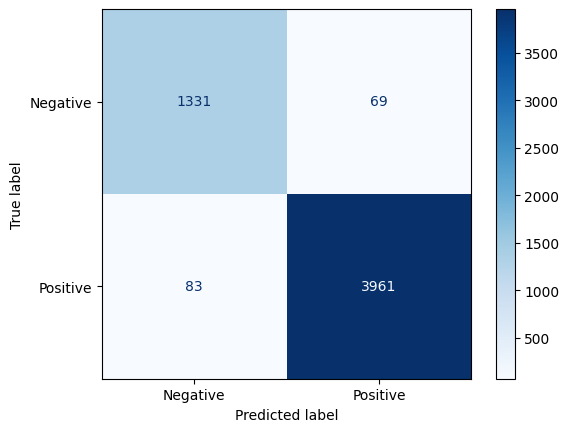

accuracy:  0.9720793534166055


In [16]:
# try on full dataset with checkpoint 10
full_predictions = db.predict(full_dataset_forpred['text'], model=model10, tokenizer=tokenizer10)
db.visualize_confusion_matrix(predicted_labels=full_predictions['preds'],\
                              real_labels=full_dataset_forpred['label'])

report = db.confusion_matrix(predicted_labels=full_predictions['preds'],\
                              real_labels=full_dataset_forpred['label'])
print('accuracy: ', report['accuracy'])

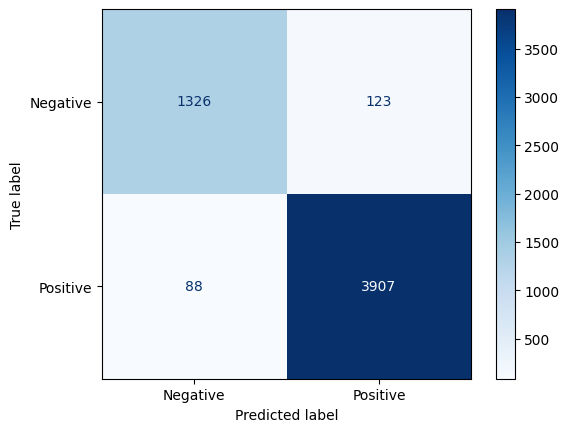

accuracy:  0.9612417340191036


In [17]:
# try on full dataset with uploaded model from Hugging Face
full_predictions = db.predict(full_dataset_forpred['text'], model=model_hf, tokenizer=tokenizer_hf)
db.visualize_confusion_matrix(predicted_labels=full_predictions['preds'],\
                              real_labels=full_dataset_forpred['label'])

report = db.confusion_matrix(predicted_labels=full_predictions['preds'],\
                              real_labels=full_dataset_forpred['label'])
print('accuracy: ', report['accuracy'])

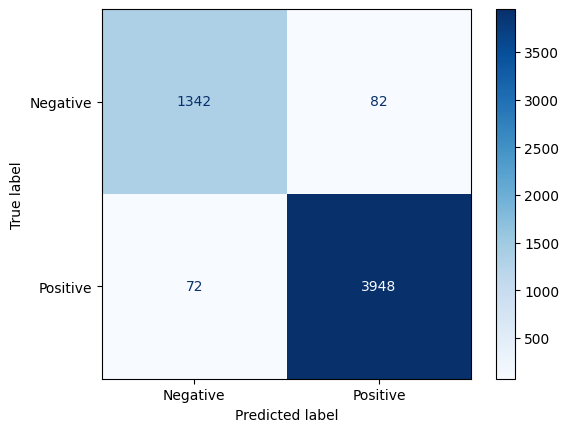

accuracy:  0.9717119764878765


In [18]:
model8, tokenizer8 = load_model_dynamic("./DistilBERT1/checkpoint-1640/")
full_predictions = db.predict(full_dataset_forpred['text'], model=model8, tokenizer=tokenizer8)
db.visualize_confusion_matrix(predicted_labels=full_predictions['preds'],\
                              real_labels=full_dataset_forpred['label'])

report = db.confusion_matrix(predicted_labels=full_predictions['preds'],\
                              real_labels=full_dataset_forpred['label'])
print('accuracy: ', report['accuracy'])

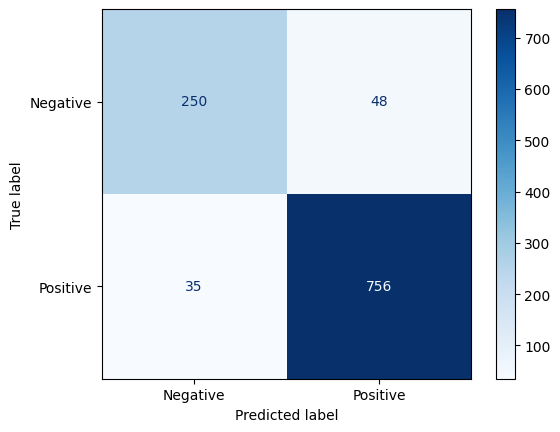

accuracy:  0.9237832874196511


In [19]:
model8, tokenizer8 = load_model_dynamic("./DistilBERT1/checkpoint-1640/")
full_predictions = db.predict(test_dataset['text'], model=model8, tokenizer=tokenizer8)
db.visualize_confusion_matrix(predicted_labels=full_predictions['preds'],\
                              real_labels=test_dataset['label'])

report = db.confusion_matrix(predicted_labels=full_predictions['preds'],\
                              real_labels=test_dataset['label'])
print('accuracy: ', report['accuracy'])